# Programming Dynamic Systems

In [230]:
library(tidyverse)

## Plot the logistic growth function against population size *n* and its solution

Logistic equation used for solving for the slope of the population curve at different populations

$$
\frac{dn}{dt} = r_0 n \left( 1 - \frac{n}{K} \right)
$$


The solution of the logistic growth function is used to solve the population at a given time starting at a certain population size

$$
n(t) = \frac{K}{1 + \left(\frac{K}{n(0)} - 1 \right) e^{-r_0t}}
$$

### Part I: Theoretical

In [231]:
# Functions
derive <- function(r0, K, n) {
  return(r0 * n * (1 - n / K))
}

solve <- function(K, n0, r0, t) {
  return(K / (1 + (K / n0 - 1) * exp(1)^(-r0 * t)))
}

growth_rate <- function(r0, K, pop_step, pop_x_final) {
  # Initialize counter
  n <- seq(0, pop_x_final, pop_step)
  
  # Initialize vector to store responses in
  dndt <- rep(0, length(n))
  
  # Calculate dndt
  for (i in seq_along(n)) {
    dndt[i] <- derive(r0, K, n[i])
  }

  # Create dataframe
  df_gr <- tibble(n, dndt)
  return(df_gr)
}

solution <- function(r0, K, n0, time_step, time_x_final) {
  # Initialize counter
  t <- seq(0, time_x_final, time_step)

  # Initialize vector to store population counts
  nt <- rep(0, length(t))

  # Solve population size
  for (i in seq_along(t)) {
    nt[i] <- solve(K, n0, r0, t[i])
  }

  # Create dataframe
  df_s <- tibble(t, nt)
  return(df_s)
}

In [232]:
# Initialize model parameters
r0 <- 1  # intrinsic growth rate
K <- 100  # carrying capacity
n0 <- 2  # population at time 0

pop_step <- 10  # step size for iteratively plotting
time_step <- 1  # step size for iteratively solving the model
pop_x_final <- 120  # x axis limit when population = x
time_x_final <- 10  # x axis limit when time = x

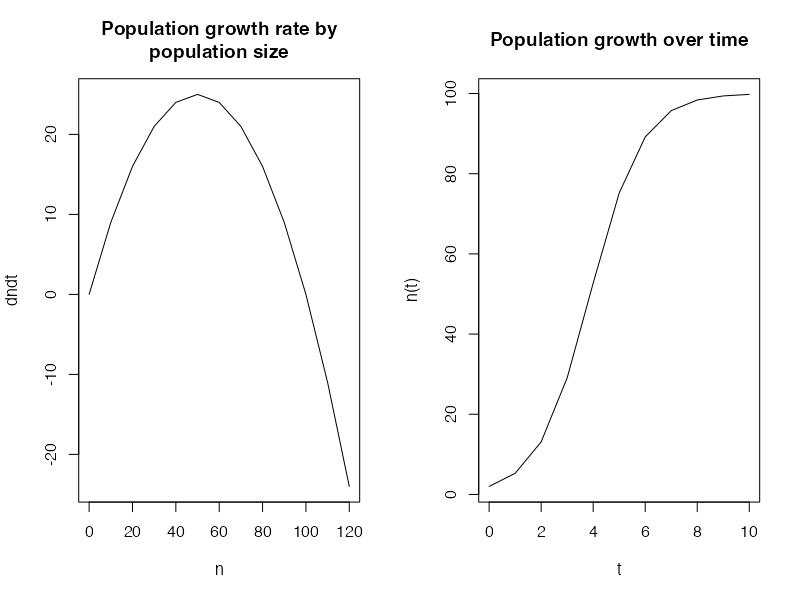

In [233]:
# Create dataframes
df_gr <- growth_rate(r0, K, pop_step, pop_x_final)
df_s <- solution(r0, K, n0, time_step, time_x_final)

# Plot data
par(mfrow = c(1, 2))
plot(df_gr, type = "l", main = "Population growth rate by\npopulation size")
plot(df_s, type = "l", main = "Population growth over time", ylab = "n(t)")

## Part II: Test

Calculate $ \frac{\Delta n}{\Delta t} $ for different points on the population growth over time curve. In other words, use linearization and compare it to the correct results generated above

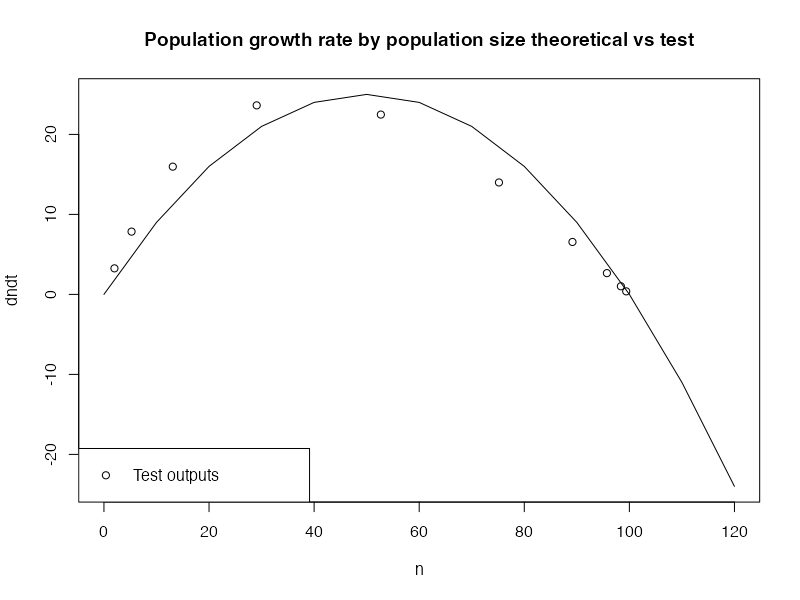

In [239]:
# Create vector of population counts
n <- df_s$nt[1:length(df_s$nt) - 1]

# Calculate dndt by taking the difference between two population counts over difference in time
dndt <- diff(df_s$nt) / diff(df_s$t)
df_gr_test <- tibble(n, dndt)

# Plot
par(mfrow = c(1, 1))
plot(df_gr, type = "l", main = "Population growth rate by population size theoretical vs test")
points(df_gr_test)
legend(x = "bottomleft", legend = "Test outputs", pch = 1)

Loop across a small time interval and use the function `derive()` to calculate the change in population, and continue. Compare to theoretical solution.

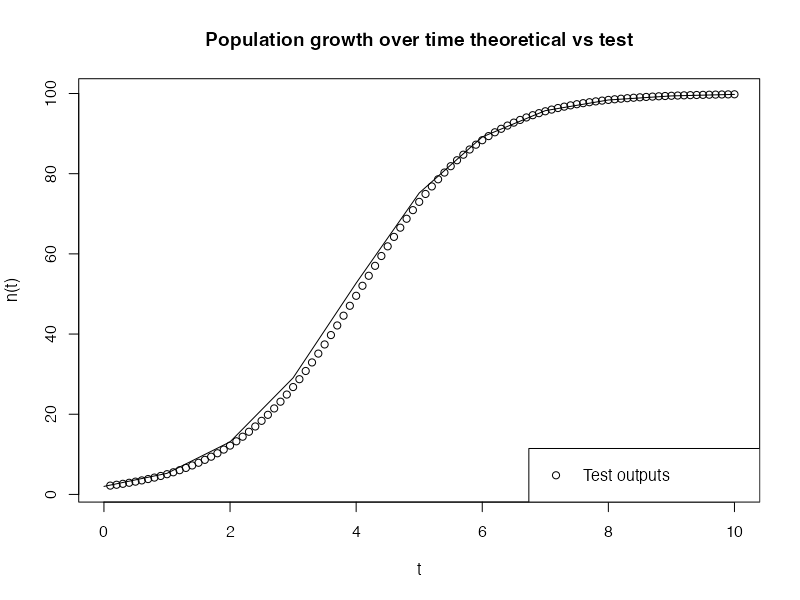

In [235]:
# Initialize variables
n <- n0
t <- 0
t0 <- t
dt <- 0.1

# Create empty vectors to store values of t and n in
n_vals <- rep(0, ((time_x_final - t0) / dt)) 
t_vals <- rep(0, ((time_x_final - t0) / dt))

# Calculate the change in population for each dt
for (i in seq_along(t_vals)) {
  dn <- derive(r0, K, n) * dt

  # Update n and t, instert into vectors
  n <- n + dn
  t <- t + dt
  n_vals[i] <- n
  t_vals[i] <- t
}

# Create dataframe
df_s_test <- tibble(t_vals, n_vals)

# Plot
plot(df_s, type = "l", main = "Population growth over time theoretical vs test", ylab = "n(t)")
points(df_s_test)
legend(x = "bottomright", legend = "Test outputs", pch = 1)

### Part III: Create an ODE solver

Re-write the program in exercise 4 to a general ode-solver, taking the function $f(t,x)$ as an input parameter. Test it with functions with known solutions, such as exponential or logistic growth. Another possible test is a function $f(t,x)=cos(t)$ with solution $y=sin(t) + y(0)$ (can you see why?).

In [ ]:
# Define the solver function

# Implement the Euler solution

# Implement dynamic step size

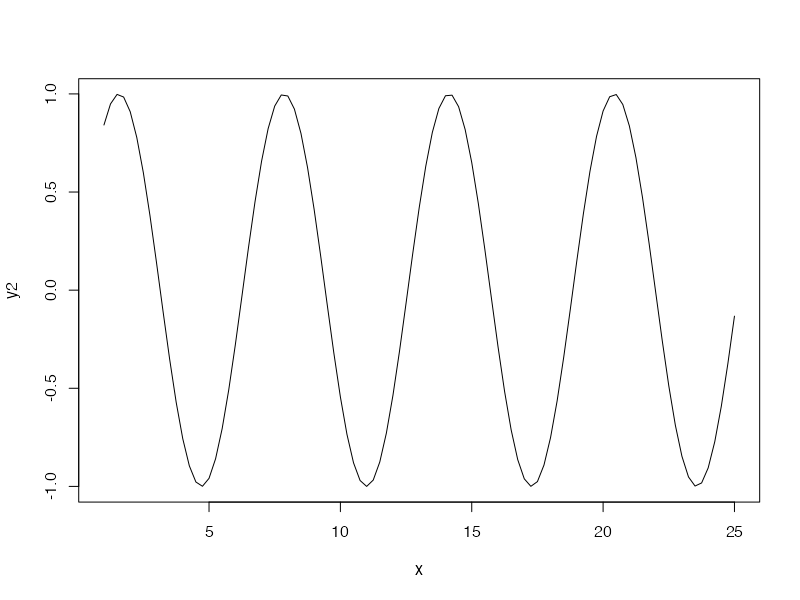

In [247]:
x <- seq(1, 25, by = .25)
y1 <- cos(x)
y2 <- sin(x)

df <- tibble(x, y2)

plot(df, type = "l")